# Neural Network with Logistic Regression

In [3]:
import numpy as np

In [4]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [5]:
sigmoid(np.array([0,2]))

array([0.5       , 0.88079708])

In [6]:
def initialize_with_zeros(dim):
    w = np.zeros(shape=(dim, 1))
    b = 0
    return w, b

In [7]:
dim = 2 
initialize_with_zeros(dim)

(array([[0.],
        [0.]]), 0)

## Feed Forward and Backward Propagation

In [8]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    # forward propagatioin
    
    computing = np.dot(w.T, X) + b
    Activation = sigmoid(computing)
    cost = (-1/m) * np.sum(Y*np.log(Activation) + (1-Y) * np.log(1-Activation))
    
    # Backward Propagation
    dw = (1/m) * np.dot(X, ((Activation-Y).T))
    db = (1/m) * np.sum(Activation - Y)
    
    grad = {'dw': dw,
            'db': db}
    return grad, cost

In [9]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print(grads, cost)

{'dw': array([[0.99845601],
       [2.39507239]]), 'db': 0.001455578136784208} 5.801545319394553


## Optimization

In [10]:
def optimize(w, b, X, Y, num_iteration, learning_rate):
    costs = []
    all_costs = []
    for i in range(num_iteration):
        grads, cost = propagate(w, b, X, Y)
        all_costs.append(cost)
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate * dw
        b = b - learning_rate * db

        if i % 100 == 0:
            print(f"cost after iteration {i: 2f} = {cost}")
            costs.append(cost)
            
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, cost, all_costs

cost after iteration  0.000000 = 5.801545319394553
cost after iteration  100.000000 = 1.055933444321741
cost after iteration  200.000000 = 0.3783029181411113
cost after iteration  300.000000 = 0.3635949111482283
cost after iteration  400.000000 = 0.3562416177005574
cost after iteration  500.000000 = 0.3492096333906643
cost after iteration  600.000000 = 0.342420465089162
cost after iteration  700.000000 = 0.3358602820101594
cost after iteration  800.000000 = 0.32951704926683034
cost after iteration  900.000000 = 0.32337975629352356


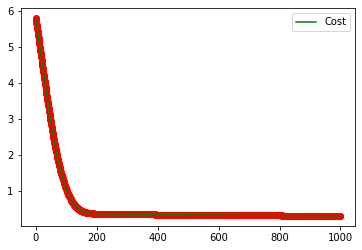

In [11]:
from matplotlib import pyplot as plt

costs = optimize(w, b, X, Y, num_iteration = 1000, learning_rate = 0.009)

# cost ploting..
plt.scatter(range(len(costs[3])), costs[3], marker='o', color='red')
plt.plot(costs[3], color='green', label='Cost')
plt.legend()
plt.show()


In [12]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X)+b)
    
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] >= 0.5 else 0
    
    return Y_prediction

In [13]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


## Merging all functions

In [14]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 500, learning_rate = 0.01):
    w, b = initialize_with_zeros(X_train.shape[0])
    
    parameters, grads, costs, allcost = optimize(w, b, X_train, Y_train, num_iteration=num_iterations,
                                        learning_rate=learning_rate)
    
    w = parameters['w']
    b = parameters['b']
    
    Y_prediction_test = predict(w, b, X_test)
    
    print('-'*50)
    
    print(f"accuracy: {100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100}")
    
    d = {"costs": costs,
         "all_costs" : allcost,
         "Y_prediction_test": Y_prediction_test, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

# Train and Test

In [35]:
from lr_utils import load_dataset

In [36]:
X_train, Y_train, X_test, Y_test, classes = load_dataset()

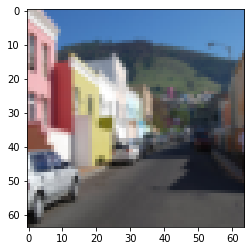

Not cat: y = [0]


In [37]:
plt.imshow(X_train[1])
plt.show()
print(f"Not cat: y = {Y_train[:, 1]}")

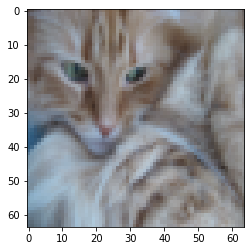

Not cat: y = [0]


In [38]:
plt.imshow(X_train[2]);plt.show()
print(f"Not cat: y = {Y_train[:, 1]}")

# flatten image

In [40]:
X_train = X_train.reshape(X_train.shape[0], -1).T
X_test = X_test.reshape(X_test.shape[0], -1).T

In [41]:
print(f"X_train shape : {X_train.shape} \n X_test shape :  {X_test.shape}\n Y_train shape : {Y_train.shape} \n Y_test shape : {Y_test.shape}")

X_train shape : (12288, 209) 
 X_test shape :  (12288, 50)
 Y_train shape : (1, 209) 
 Y_test shape : (1, 50)


## Standardize

In [42]:
X_train = X_train / 255
X_test = X_test / 255

# Training and testing

In [43]:
d = model(X_train, Y_train, X_test, Y_test, num_iterations=500)

cost after iteration  0.000000 = 0.6931471805599453
cost after iteration  100.000000 = 0.8239208681633668
cost after iteration  200.000000 = 0.4189444730732313
cost after iteration  300.000000 = 0.6173497040862219
cost after iteration  400.000000 = 0.5221157718693101
--------------------------------------------------
accuracy: 82.0


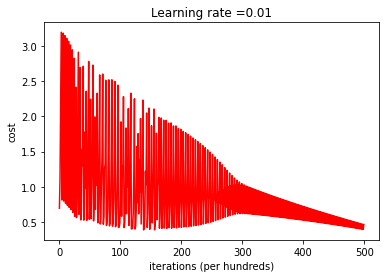

In [44]:
# Plot learning curve (with costs)
plt.plot(d['all_costs'], color='red')
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

# predicting

In [45]:
import scipy
from scipy import ndimage

In [46]:
path = '/content/cat1.jpg'

In [49]:
image = np.array(ndimage.imread(path, flatten=False))
image = image/255
my_image = scipy.misc.imresize(image, size=(64,64)).reshape((1, 64*64*3)).T

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Thats cat :)


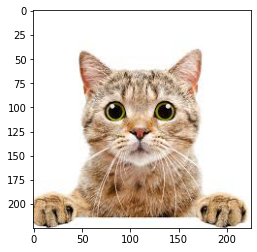

In [53]:
ans = predict(d['w'], d['b'], my_image)

if ans:
  print("Thats cat :)")
  plt.imshow(image)
else:
  print("Thats not a cat")
  plt.imshow(image)